In [1024]:
using CairoMakie
using CSV
using DataFrames
using Dates
using Statistics

# PART 1
Make graph of actual and forecast wind
- MW vs DAYS
- MW on y axis | DAYS on x axis
- Display only Monday dates

In [1025]:
windgen = CSV.read("wind-gen.csv", DataFrame)

Row,DATE & TIME,FORECAST WIND(MW),ACTUAL WIND(MW),REGION
,String31,Int64,String7,String15
1,29 October 2023 00:00,1173,804,All Island
2,29 October 2023 00:15,1204,729,All Island
3,29 October 2023 00:30,1235,752,All Island
4,29 October 2023 00:45,1267,705,All Island
5,29 October 2023 01:00,1135,754,All Island
6,29 October 2023 01:00,1180,754,All Island
7,29 October 2023 01:15,1146,762,All Island
8,29 October 2023 01:15,1201,762,All Island
9,29 October 2023 01:30,1157,772,All Island


In [1026]:
datef = dateformat"dd U yyyy HH:MM"

dateformat"dd U yyyy HH:MM"

In [1027]:
data1 = DataFrame(
    DATE = Date.(windgen."DATE & TIME", datef),
    FORWIND = windgen." FORECAST WIND(MW)",
    ACCWIND = windgen."  ACTUAL WIND(MW)"
)

Row,DATE,FORWIND,ACCWIND
,Date,Int64,String7
1,2023-10-29,1173,804
2,2023-10-29,1204,729
3,2023-10-29,1235,752
4,2023-10-29,1267,705
5,2023-10-29,1135,754
6,2023-10-29,1180,754
7,2023-10-29,1146,762
8,2023-10-29,1201,762
9,2023-10-29,1157,772


In [1028]:
re = r"^[0-9]*$"
data1.ACCWIND = [occursin(re, val) ? parse(Int, val) : missing for val in data1.ACCWIND]

2884-element Vector{Union{Missing, Int64}}:
 804
 729
 752
 705
 754
 754
 762
 762
 772
 772
   ⋮
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing

In [1029]:
data1

Row,DATE,FORWIND,ACCWIND
,Date,Int64,Int64?
1,2023-10-29,1173,804
2,2023-10-29,1204,729
3,2023-10-29,1235,752
4,2023-10-29,1267,705
5,2023-10-29,1135,754
6,2023-10-29,1180,754
7,2023-10-29,1146,762
8,2023-10-29,1201,762
9,2023-10-29,1157,772


In [1]:
mondays1 = filter(row -> dayofweek(row.DATE) == 1, data1)

UndefVarError: UndefVarError: `data1` not defined

In [1030]:
day1 = string.(unique(mondays1.DATE))

5-element Vector{String}:
 "2023-10-30"
 "2023-11-06"
 "2023-11-13"
 "2023-11-20"
 "2023-11-27"

In [1031]:
xval = 1:length(data1.DATE)

1:2884

In [1032]:
dayrow1(x) = findfirst(==(x), string.(data1.DATE))

dayrow1 (generic function with 1 method)

In [1033]:
step1 = dayrow1.(day1)

5-element Vector{Int64}:
  101
  773
 1445
 2117
 2789

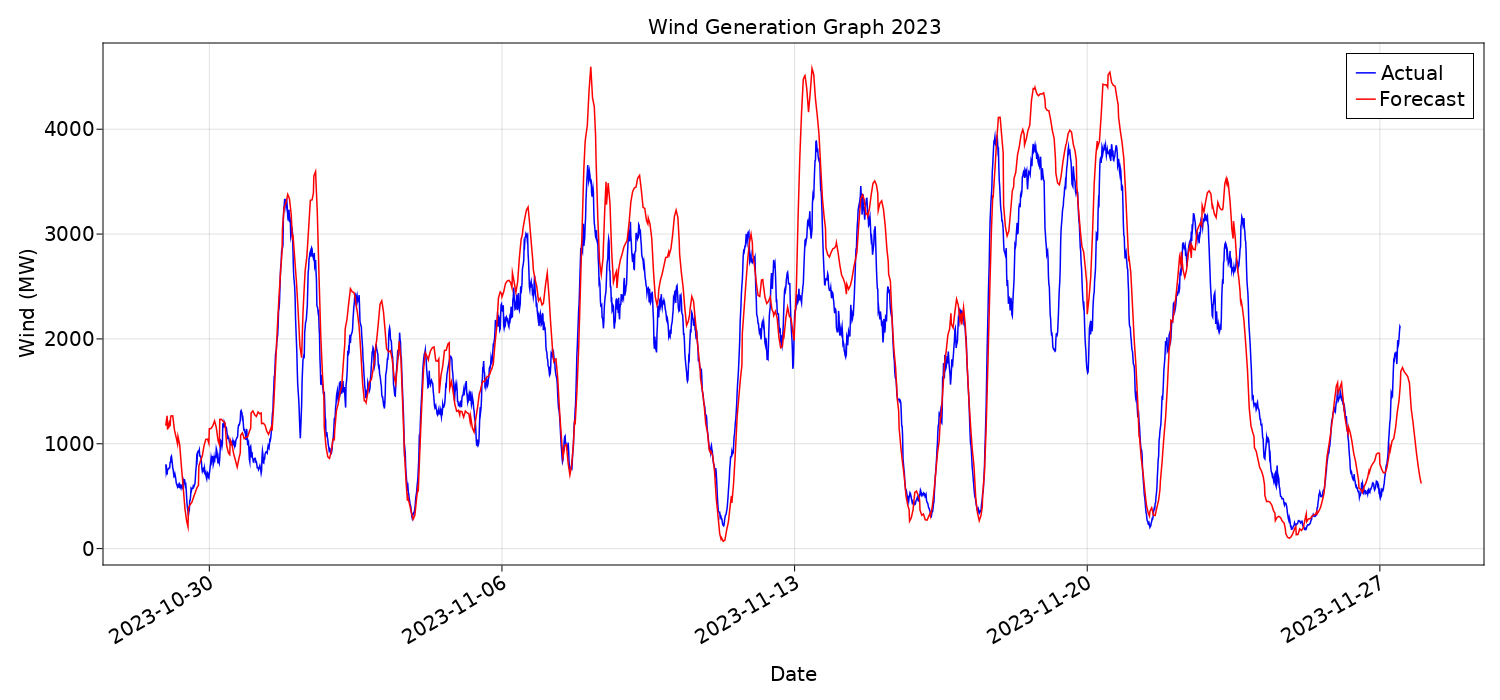

In [1034]:
fig1 = Figure(resolution = (1500, 700), fontsize = 20);
ax1 = Axis(fig1[1, 1],
    xticks = (step1, day1),
    xticklabelalign = (:right, :center),
    xticklabelpad = 10,
    xlabel = "Date",
    xticklabelrotation = π / 6,
    ylabel = "Wind (MW)",
    title = "Wind Generation Graph 2023")
lines!(ax1, xval, data1.ACCWIND, color = :blue, label = "Actual")
lines!(ax1, xval, data1.FORWIND, color = :red, label = "Forecast")
axislegend(ax1)
fig1

In [1035]:
save("wind-genNB.png", fig1)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00000253020cbac0, 1500.0, 700.0)


# PART 2

In [1036]:
sysdem = CSV.read("system-demand.csv", DataFrame)

Row,DATE & TIME,ACTUAL DEMAND(MW),FORECAST DEMAND(MW),REGION
,String31,String7,String7,String15
1,29 October 2023 00:00,3819,-,All Island
2,29 October 2023 00:15,3813,-,All Island
3,29 October 2023 00:30,3770,-,All Island
4,29 October 2023 00:45,3715,-,All Island
5,29 October 2023 01:00,3686,-,All Island
6,29 October 2023 01:15,3648,-,All Island
7,29 October 2023 01:30,3606,-,All Island
8,29 October 2023 01:45,3575,-,All Island
9,29 October 2023 02:00,3443,-,All Island


In [1037]:
data2 = DataFrame(
    DATETIME = DateTime.(sysdem."DATE & TIME", datef),
    DEMAND = sysdem." ACTUAL DEMAND(MW)")

Row,DATETIME,DEMAND
,DateTime,String7
1,2023-10-29T00:00:00,3819
2,2023-10-29T00:15:00,3813
3,2023-10-29T00:30:00,3770
4,2023-10-29T00:45:00,3715
5,2023-10-29T01:00:00,3686
6,2023-10-29T01:15:00,3648
7,2023-10-29T01:30:00,3606
8,2023-10-29T01:45:00,3575
9,2023-10-29T02:00:00,3443


In [1038]:
data2.DEMAND = [occursin(re, val) ? parse(Int, val) : missing for val in data2.DEMAND]

2880-element Vector{Union{Missing, Int64}}:
 3819
 3813
 3770
 3715
 3686
 3648
 3606
 3575
 3443
 3451
    ⋮
     missing
     missing
     missing
     missing
     missing
     missing
     missing
     missing
     missing

In [1039]:
data2.DATETIME = floor.(DateTime.(data2.DATETIME), Dates.Hour)

2880-element Vector{DateTime}:
 2023-10-29T00:00:00
 2023-10-29T00:00:00
 2023-10-29T00:00:00
 2023-10-29T00:00:00
 2023-10-29T01:00:00
 2023-10-29T01:00:00
 2023-10-29T01:00:00
 2023-10-29T01:00:00
 2023-10-29T02:00:00
 2023-10-29T02:00:00
 ⋮
 2023-11-27T21:00:00
 2023-11-27T22:00:00
 2023-11-27T22:00:00
 2023-11-27T22:00:00
 2023-11-27T22:00:00
 2023-11-27T23:00:00
 2023-11-27T23:00:00
 2023-11-27T23:00:00
 2023-11-27T23:00:00

In [1040]:
data2

Row,DATETIME,DEMAND
,DateTime,Int64?
1,2023-10-29T00:00:00,3819
2,2023-10-29T00:00:00,3813
3,2023-10-29T00:00:00,3770
4,2023-10-29T00:00:00,3715
5,2023-10-29T01:00:00,3686
6,2023-10-29T01:00:00,3648
7,2023-10-29T01:00:00,3606
8,2023-10-29T01:00:00,3575
9,2023-10-29T02:00:00,3443


In [1041]:
data2 = combine(groupby(data2, :DATETIME), names(data2, Not(:DATETIME)) .=> mean, renamecols=false)

Row,DATETIME,DEMAND
,DateTime,Float64?
1,2023-10-29T00:00:00,3779.25
2,2023-10-29T01:00:00,3628.75
3,2023-10-29T02:00:00,3430.5
4,2023-10-29T03:00:00,3378.75
5,2023-10-29T04:00:00,3363.0
6,2023-10-29T05:00:00,3411.0
7,2023-10-29T06:00:00,3564.25
8,2023-10-29T07:00:00,3791.5
9,2023-10-29T08:00:00,4155.25


In [1042]:
data3 = DataFrame(
    DATE = Date.(data2.DATETIME),
    TIME = Time.(data2.DATETIME),
    DEMAND = [ismissing(val) ? missing : floor(Int, val) for val in data2.DEMAND]
)

Row,DATE,TIME,DEMAND
,Date,Time,Int64?
1,2023-10-29,00:00:00,3779
2,2023-10-29,01:00:00,3628
3,2023-10-29,02:00:00,3430
4,2023-10-29,03:00:00,3378
5,2023-10-29,04:00:00,3363
6,2023-10-29,05:00:00,3411
7,2023-10-29,06:00:00,3564
8,2023-10-29,07:00:00,3791
9,2023-10-29,08:00:00,4155


In [1043]:
dataarray = Array(unstack(data3, :DATE, :TIME, :DEMAND)[!, 2:end])

30×24 Matrix{Union{Missing, Int64}}:
 3779  3628  3430  3378  3363  3411  3564  3791  …  4091         3897
 3700  3547  3445  3388  3376  3444  3666  3990     4219         3936
 3693  3567  3525  3463  3446  3560  3983  4586     4415         4134
 3893  3740  3626  3557  3517  3633  4045  4645     4641         4332
 4052  3896  3806  3749  3744  3822  4192  4797     4673         4348
 4071  3890  3776  3680  3644  3716  4090  4667  …  4609         4349
 4105  3915  3811  3697  3618  3617  3790  4077     4328         4110
 3882  3703  3596  3510  3448  3439  3552  3735     4180         3904
 3668  3532  3483  3414  3418  3541  4001  4811     4564         4251
 3949  3775  3713  3655  3631  3729  4184  5000     4658         4280
    ⋮                             ⋮              ⋱               
 3890  3715  3575  3472  3409  3388  3507  3710     4351         4101
 3840  3691  3609  3536  3516  3625  4067  4888     4653         4314
 3988  3826  3783  3725  3734  3831  4291  5135     4726 

In [1044]:
mondays2 = filter(row -> dayofweek(row.DATE) == 1, data3)
day2 = string.(unique(mondays2.DATE))

5-element Vector{String}:
 "2023-10-30"
 "2023-11-06"
 "2023-11-13"
 "2023-11-20"
 "2023-11-27"

In [1045]:
time = string.(unique(data3.TIME))

24-element Vector{String}:
 "00:00:00"
 "01:00:00"
 "02:00:00"
 "03:00:00"
 "04:00:00"
 "05:00:00"
 "06:00:00"
 "07:00:00"
 "08:00:00"
 "09:00:00"
 ⋮
 "15:00:00"
 "16:00:00"
 "17:00:00"
 "18:00:00"
 "19:00:00"
 "20:00:00"
 "21:00:00"
 "22:00:00"
 "23:00:00"

In [1046]:
dayrow2(x) = findfirst(==(x), string.(unique(data3.DATE)))

dayrow2 (generic function with 1 method)

In [1047]:
step2 = dayrow2.(day2)

5-element Vector{Int64}:
  2
  9
 16
 23
 30

In [1048]:
fig2 = Figure(resolution = (1500, 1000), fontsize = 20)
ax2 = Axis(
    fig2[1, 1],
    xticks = (step2, day2),
    xticklabelalign = (:right, :center),
    xticklabelpad = 10,
    xticklabelrotation = π / 6,
    xlabel = "Date",
    yticks = (1:size(dataarray)[2], time),
    yticklabelalign = (:right, :center),
    ylabel = "Time",
    title = "System Demand Heatmap 2023")
hm = heatmap!(ax2, dataarray)

Heatmap{Tuple{IntervalSets.ClosedInterval{Float32}, IntervalSets.ClosedInterval{Float32}, Matrix{Float32}}}

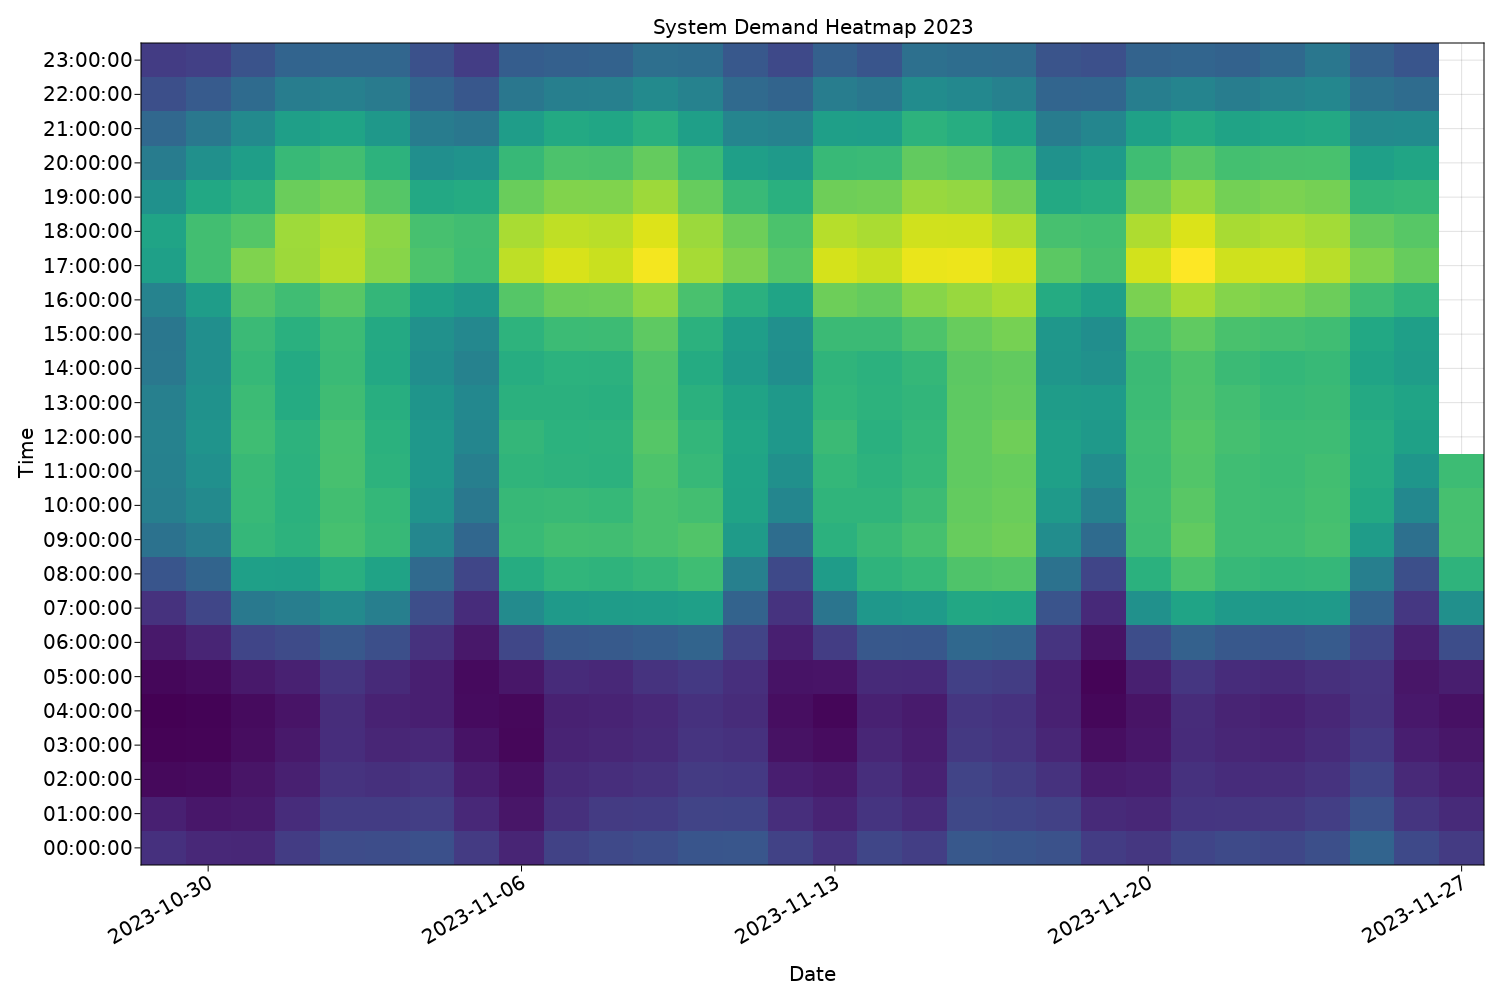

In [1049]:
fig2

In [1050]:
Colorbar(fig2[1, 2], hm)

Colorbar()

In [1051]:
function colourcheck(x)
    if ismissing(x)
        return :red
    elseif x < 5000
        return :white
    else 
        return :black
    end
end

colourcheck (generic function with 1 method)

In [1052]:
colors = colourcheck.(dataarray)

30×24 Matrix{Symbol}:
 :white  :white  :white  :white  :white  …  :white  :white  :white  :white
 :white  :white  :white  :white  :white     :white  :white  :white  :white
 :white  :white  :white  :white  :white     :black  :white  :white  :white
 :white  :white  :white  :white  :white     :black  :black  :white  :white
 :white  :white  :white  :white  :white     :black  :black  :white  :white
 :white  :white  :white  :white  :white  …  :black  :white  :white  :white
 :white  :white  :white  :white  :white     :white  :white  :white  :white
 :white  :white  :white  :white  :white     :white  :white  :white  :white
 :white  :white  :white  :white  :white     :black  :black  :white  :white
 :white  :white  :white  :white  :white     :black  :black  :white  :white
 ⋮                                       ⋱  ⋮                       
 :white  :white  :white  :white  :white     :black  :white  :white  :white
 :white  :white  :white  :white  :white     :black  :black  :white  :white
 :white  

In [1053]:
for x in 1:size(dataarray)[1], y in 1:size(dataarray)[2]
text!(ax2,
    string.(dataarray)[x, y],
    position = (x, y),
    align = (:center, :center),
    color = colors[x, y],
    textsize = 12,
    )
end

In [1054]:
save("system-demand-heatmapNB.png", fig2)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00000253020cca60, 1500.0, 1000.0)


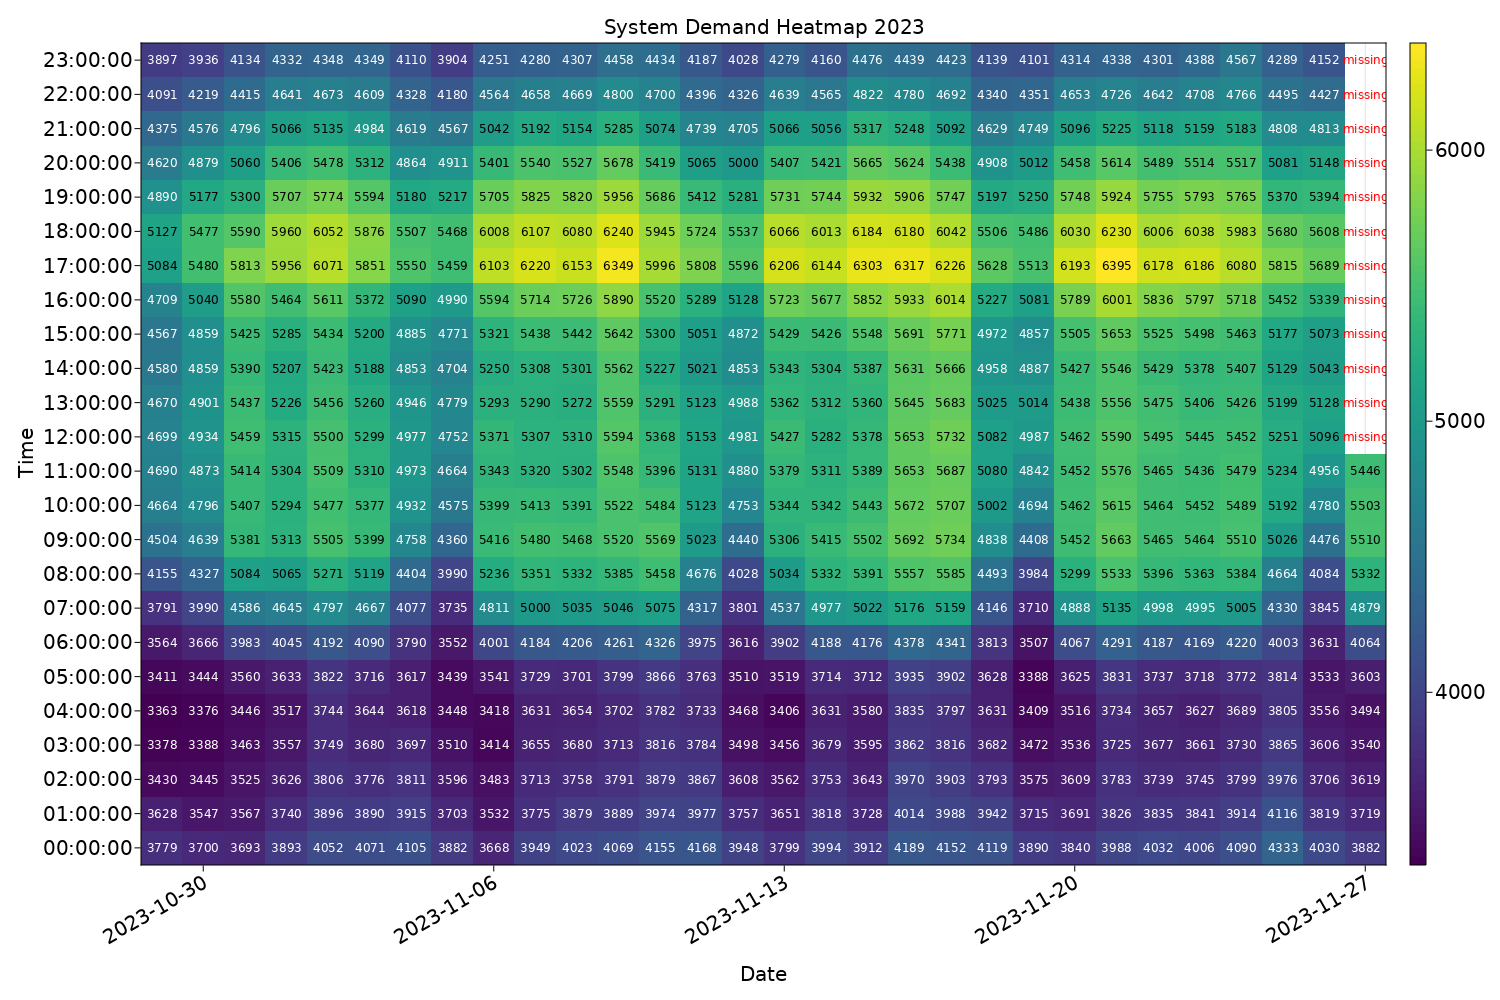

In [1055]:
fig2